In [1]:
import pandas as pd

path='/kaggle/input/diabetes-data/Diabetes_Data_1.csv'
data=pd.read_csv(path)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [2]:
#Check if there are null values
data.isnull().sum()  

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [3]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

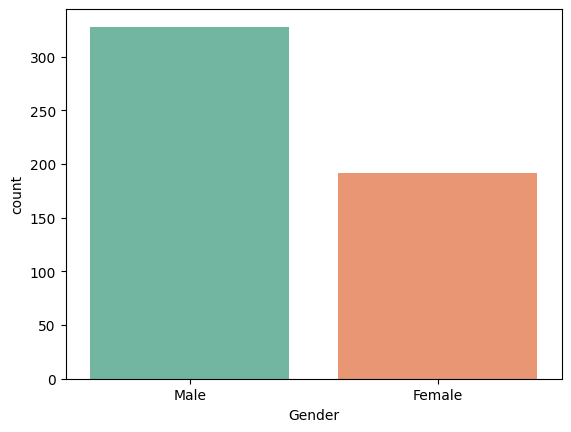

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender',
             data=data,
             palette='Set2')

**In this study, there are more male than female**

<Axes: xlabel='class', ylabel='count'>

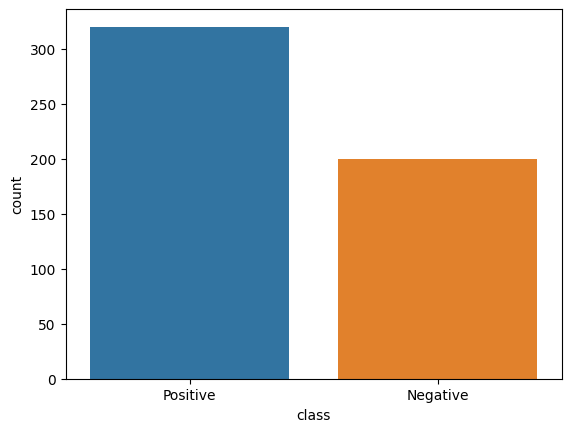

In [5]:
sns.countplot(x='class',
             data=data)

**There are more positive cases in this study than negative cases**

<Axes: xlabel='class', ylabel='count'>

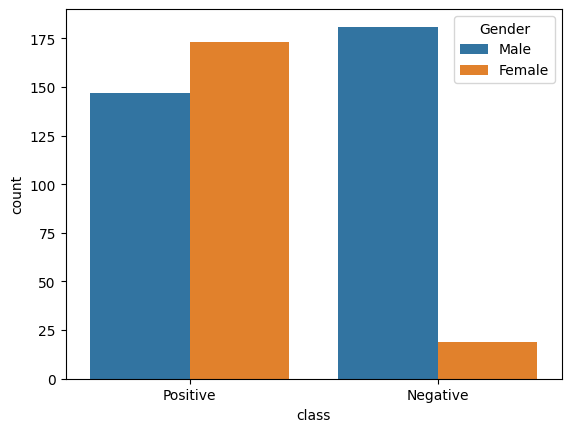

In [6]:
sns.countplot(x='class',
              hue='Gender',
             data=data)

**There are more female with diabetes as compared to male, and more males not affected by diabetes as compared to female**

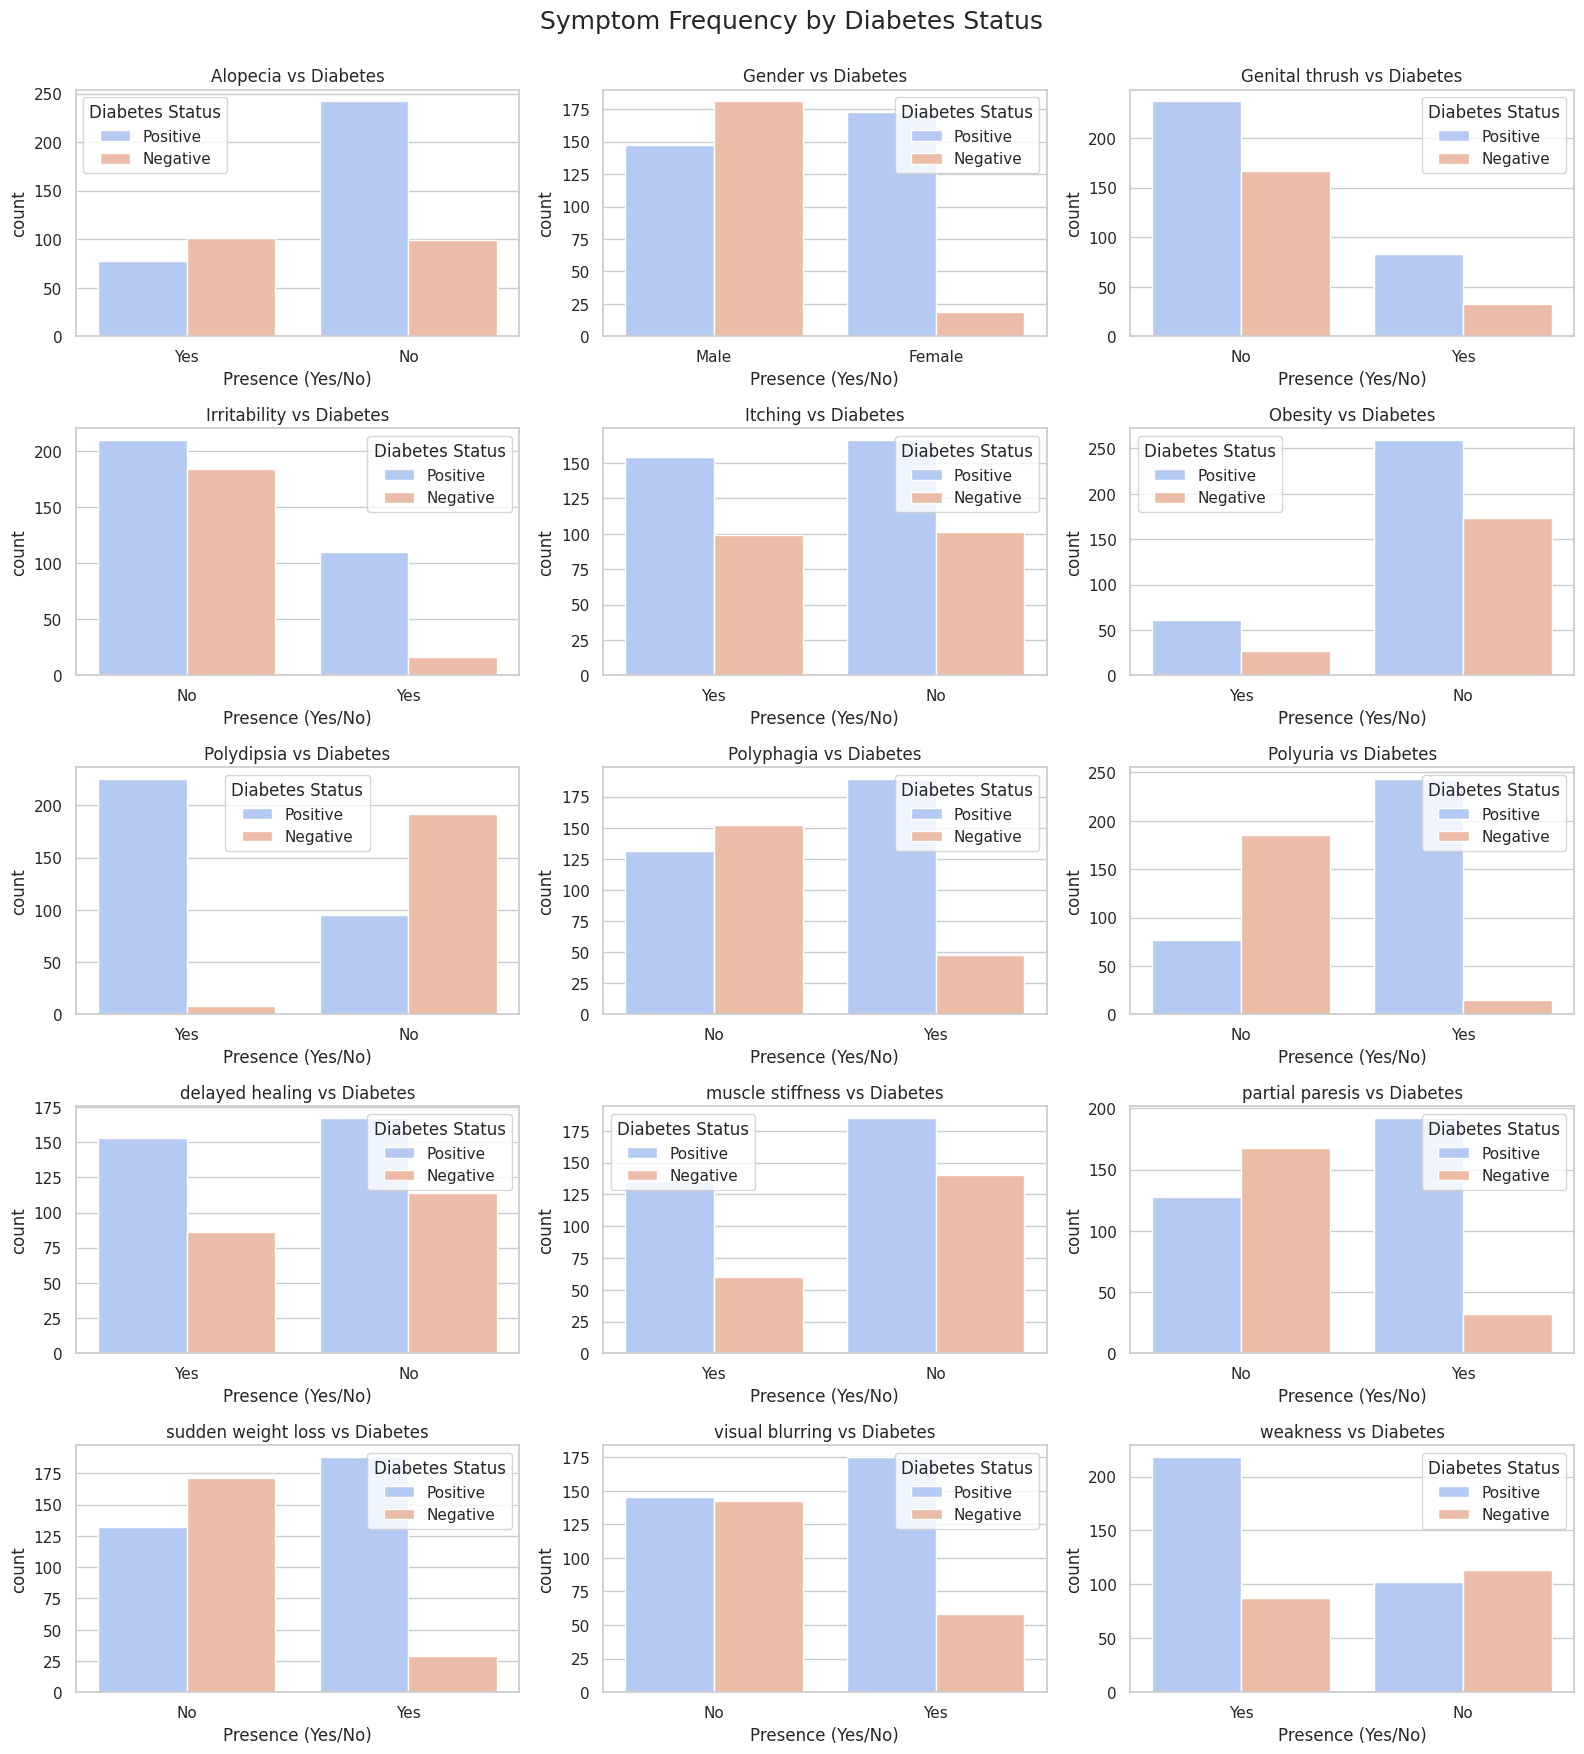

In [7]:
#set theme/ visualization style
sns.set_theme(style='whitegrid')

#exclude the age and class
binary_features = data.columns.difference(['Age', 'class'])

#create subplots
plt.figure(figsize=(16,20))

for i, feature in enumerate(binary_features, 1):
    plt.subplot(6,3,i)
    sns.countplot(x=feature, hue='class', data=data, palette='coolwarm')
    plt.title(f'{feature} vs Diabetes')
    plt.xlabel('Presence (Yes/No)')
    plt.ylabel('count')
    plt.legend(title='Diabetes Status')

plt.tight_layout()
plt.suptitle('Symptom Frequency by Diabetes Status', fontsize=18, y=1.02)

plt.show()

polyuria --a large number of diabetic individuals experience polyuria(passing a large number of urination.

polydipsia - (intense thirst)  --diabetic individuals are more likely to report polydipsia.

sudden weight weakness -- Diabetic individuals tend to experience sudden weight loss.

weakness --Diabetic individuals tend to experience sudden weakness


<ipython-input-8-2583f9d941fb>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data, x='Age',
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


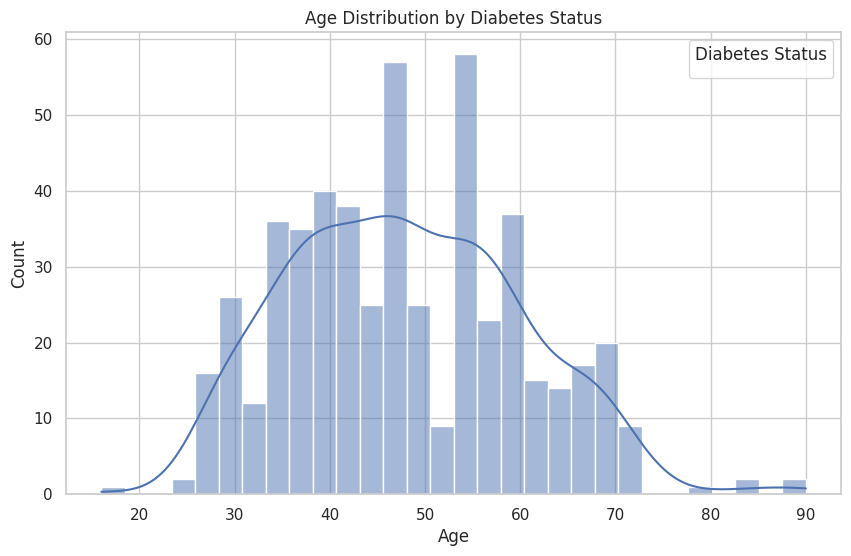

In [8]:
#visualize age distributions
plt.figure(figsize=(10,6))
sns.histplot(data, x='Age',
             kde=True,
             palette='Set2',
             bins=30)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Diabetes Status')
plt.show()

**Higher Risk Age Group: Diabetes cases are more frequent between ages of 40 and 60, showing a higher risk for middle aged individuals**

**Lower Risk Age Group: Individuals under 30 have a lower likelihood of diabetes**

**Summary: While diabetes is more common in older groups, some young individuals are still affected**

# 

In [9]:
from sklearn.preprocessing import LabelEncoder


#Convert dtypes to numeric
# Initialize LabelEncoder
encoder = LabelEncoder()

# Identify categorical columns (let's assume they are of object type)
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

# Display the first few rows of the encoded DataFrame
print("First 5 rows of the encoded dataset:")
print(data.head())

# Optional: Check the unique values after encoding
for column in categorical_columns:
    print(f"Unique values in column '{column}' after encoding: {data[column].unique()}")


First 5 rows of the encoded dataset:
   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1         

# FEATURE ENGINEERING

Categorical columns: []
               Feature  MI_Score
2             Polyuria  0.251093
3           Polydipsia  0.248879
0                  Age  0.168542
1               Gender  0.113274
4   sudden weight loss  0.103121
12     partial paresis  0.100266
6           Polyphagia  0.060888
10        Irritability  0.050512
14            Alopecia  0.035464
8      visual blurring  0.032305
5             weakness  0.029574
13    muscle stiffness  0.007606
7       Genital thrush  0.006270
15             Obesity  0.002669
11     delayed healing  0.001105
9              Itching  0.000090


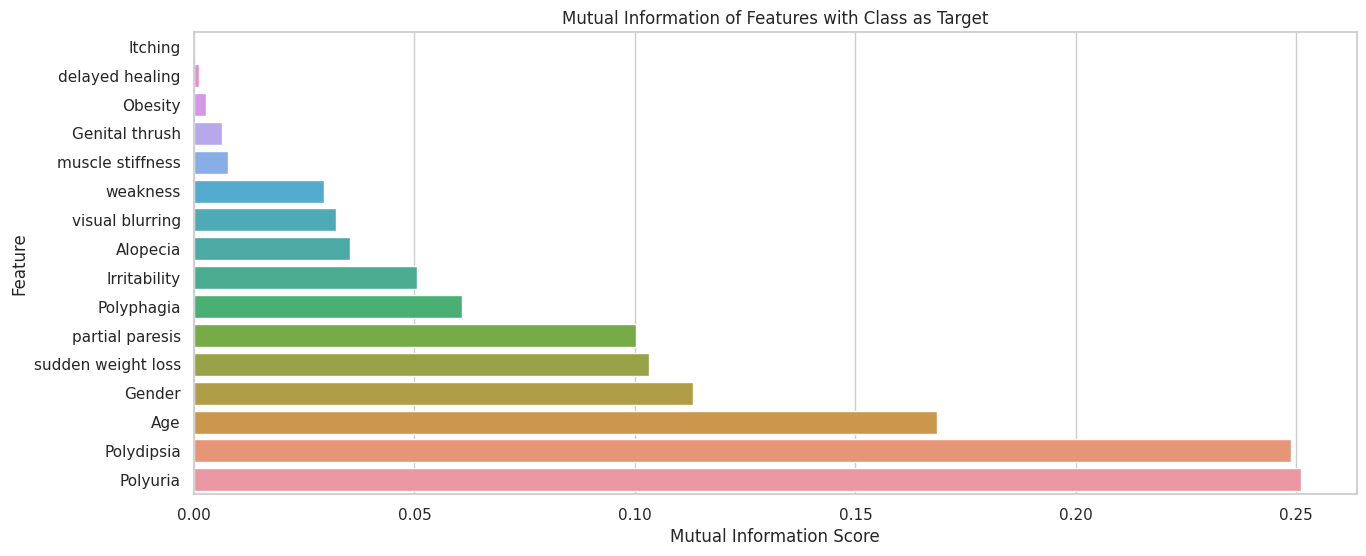

In [10]:
from sklearn.feature_selection import mutual_info_classif
# Specify the target column
target = 'class'
features = [col for col in data.columns if col != target]

# Identify categorical columns (dtype==object)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# Make a copy of the DataFrame for encoding
data_encoded = data.copy()

# Convert categorical columns to integer codes
for col in categorical_cols:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# For computing mutual information, we need to tell the function which features are discrete.
# Here, we mark features that are not float as discrete. You might refine this logic if needed.
discrete_features = [data_encoded[col].dtype != 'float64' for col in features]

# Prepare feature matrix X and target vector y
X = data_encoded[features]
y = data_encoded[target]

# Compute mutual information scores
mi = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)

# Create a DataFrame to show the scores
mi_scores = pd.DataFrame({'Feature': features, 'MI_Score': mi})
mi_scores = mi_scores.sort_values(by='MI_Score', ascending=False)
print(mi_scores)

# Optionally, plot the mutual information scores
plt.figure(figsize=(15, 6))
#plt.barh(mi_scores['Feature'], mi_scores['MI_Score'])
sns.barplot(x="MI_Score", y="Feature", data=mi_scores)
plt.xlabel("Mutual Information Score")
plt.title("Mutual Information of Features with Class as Target")
plt.gca().invert_yaxis()  # Highest score at the top
plt.show()


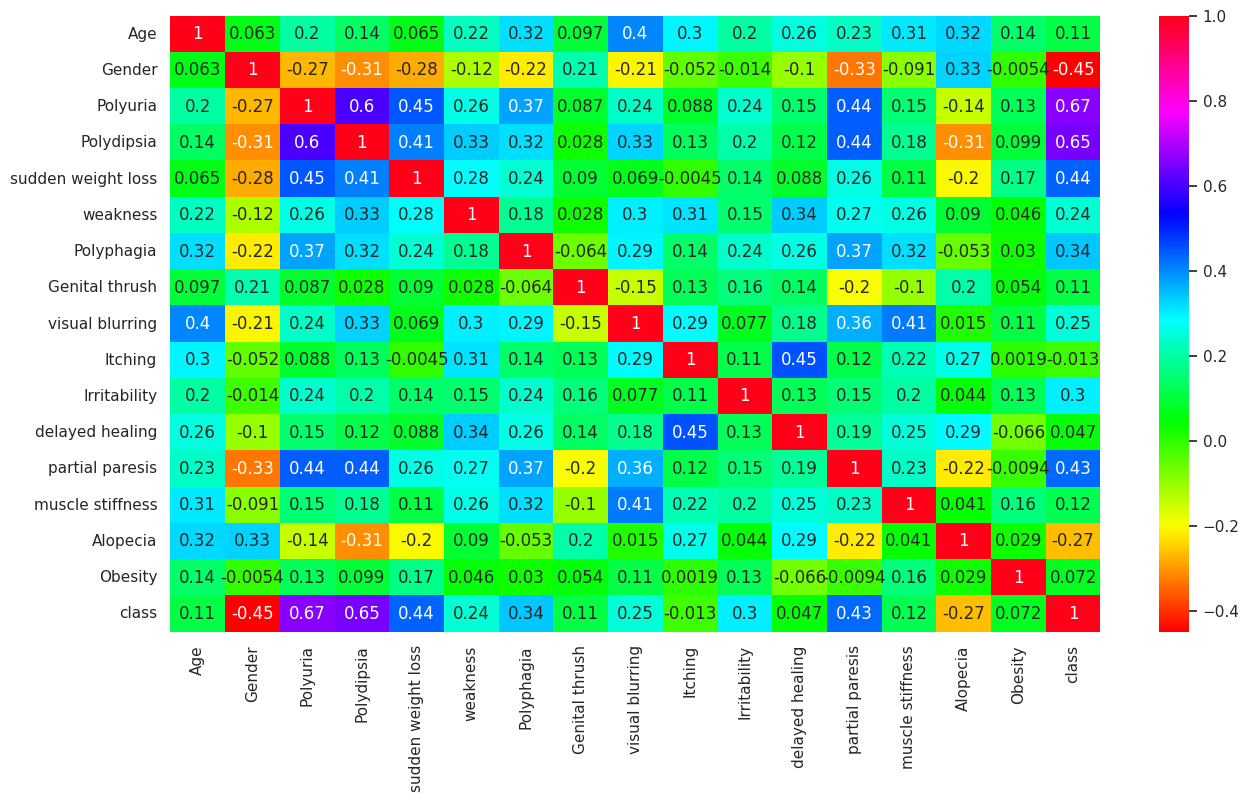

In [11]:
#Draw a correlation Matrix to assess the association between various wine ingredients.
matrix_correlation = data_encoded.corr()
plt.figure(figsize=(15,8))
sns.heatmap(matrix_correlation, annot= True, cmap = 'hsv')
plt.show()

In [12]:
# Training the Model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data[['Age', 'Gender', 'Polyuria','Polydipsia',	'sudden weight loss']]
y = data['class']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
model_dl = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification: 0 or 1)
])

# Compile the model
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_dl.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.5042 - loss: 0.6988 - val_accuracy: 0.8654 - val_loss: 0.5801
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8444 - loss: 0.5511 - val_accuracy: 0.8942 - val_loss: 0.4415
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9033 - loss: 0.4108 - val_accuracy: 0.8942 - val_loss: 0.3453
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3517 - val_accuracy: 0.8942 - val_loss: 0.2888
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9013 - loss: 0.2780 - val_accuracy: 0.9038 - val_loss: 0.2611
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8945 - loss: 0.2540 - val_accuracy: 0.8942 - val_loss: 0.2482
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9035 - loss: 0.2377 - val_accuracy: 0.9038 - val_loss: 0.2384
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8869 - loss: 0.2698 - val_accuracy: 0.9327 - val_loss

### Testing and Evaluation

In [13]:
# Evaluate the model
loss, accuracy = model_dl.evaluate(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.1622 
Model Accuracy: 89.42%


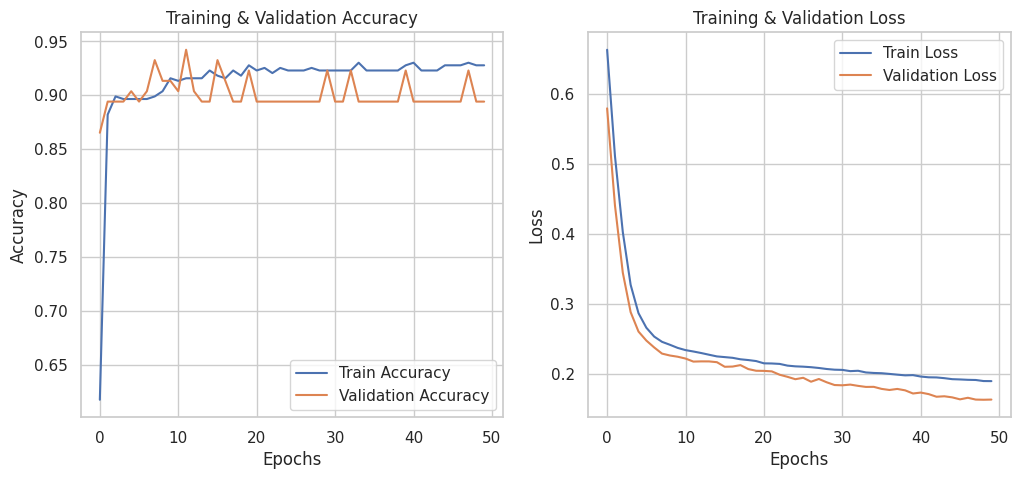

In [14]:
# Extract accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()


# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

Training and Validation Accuracy
The blue line represents training accuracy, and the orange line represents validation accuracy.
Both lines increase quickly and then stabilize around 90-93%, meaning the model is learning well and making accurate predictions.
The fluctuations in the validation accuracy suggest some variability in performance on new (unseen) data.

Training and Validation Loss
Loss measures how far off the model's predictions are.
Both training and validation loss decrease over time, which is good—it means the model is improving.
The validation loss being slightly lower than training loss suggests the model is not overfitting and is performing well on unseen data.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



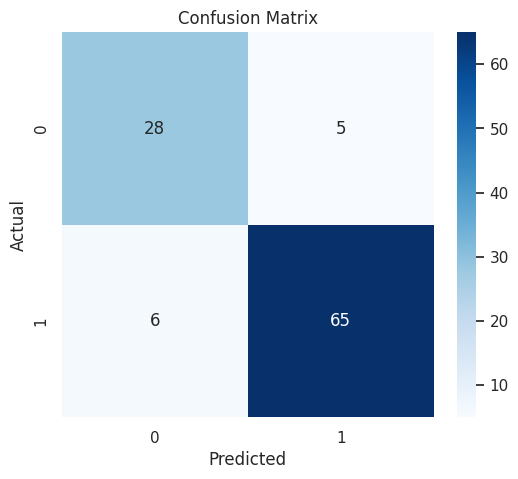

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions (convert probabilities to binary class labels)
y_pred = (model_dl.predict(X_test_scaled) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Overall Accuracy:

The model correctly classifies 89% of all test samples.
Class 0 (Negative Cases):

Precision (82%): When the model predicts 0, it is correct 82% of the time.
Recall (85%): The model correctly identifies 85% of all actual 0s in the data.
F1-score (84%): A balance between precision and recall.
Class 1 (Positive Cases):

Precision (93%): When the model predicts 1, it is correct 93% of the time.
Recall (92%): The model correctly identifies 92% of all actual 1s in the data.
F1-score (92%): A balance between precision and recall.

In [16]:
import joblib

# Save the trained model
model_filename = "/kaggle/working/model.h5"
joblib.dump(model_dl, model_filename)

print(f"Model saved as {model_filename}")

Model saved as /kaggle/working/model.h5
